# Table of Contents
 <p><div class="lev1"><a href="#Task-1.-Compiling-Ebola-Data"><span class="toc-item-num">Task 1.&nbsp;&nbsp;</span>Compiling Ebola Data</a></div>
 <div class="lev1"><a href="#Task-2.-RNA-Sequences"><span class="toc-item-num">Task 2.&nbsp;&nbsp;</span>RNA Sequences</a></div>
 <div class="lev1"><a href="#Task-3.-Class-War-in-Titanic"><span class="toc-item-num">Task 3.&nbsp;&nbsp;</span>Class War in Titanic</a></div></p>

In [2]:
DATA_FOLDER = 'Data/' # Use the data folder provided in Tutorial 02 - Intro to Pandas.

## Task 1. Compiling Ebola Data

The `DATA_FOLDER/ebola` folder contains summarized reports of Ebola cases from three countries (Guinea, Liberia and Sierra Leone) during the recent outbreak of the disease in West Africa. For each country, there are daily reports that contain various information about the outbreak in several cities in each country.

Use pandas to import these data files into a single `Dataframe`.
Using this `DataFrame`, calculate for *each country*, the *daily average per month* of *new cases* and *deaths*.
Make sure you handle all the different expressions for *new cases* and *deaths* that are used in the reports.

In [50]:
import glob
import datetime as dt
import pandas as pd

def readFiles(path,name):
    df=pd.DataFrame()
    allFiles=glob.glob(DATA_FOLDER+path)
    for file in allFiles:
        df=df.append(pd.read_csv(file))
    df['Country']=name
    return df


def readAll():
    df=pd.DataFrame()
    df=df.append(readFiles('ebola/guinea_data/*','guinea'))
    df=df.append(readFiles('ebola/liberia_data/*','liberia'))
    df=df.append(readFiles('ebola/sl_data/*','sl'))
    return df

def mergeColumns(df):
    df['Date']=df['Date'].fillna(df['date'])
    df['Description']=df['Description'].fillna(df['Variable'])
    df['Description']=df['Description'].fillna(df['variable'])
    df['Totals']=df['Totals'].fillna(df['National'])
    df['Police training School']=df['Police training School'].fillna(df['Police traning School'])
    return df

def dropColumns(df):
    df=df.drop('date', axis=1)
    df=df.drop('Variable', axis=1)
    df=df.drop('variable', axis=1)
    df=df.drop('National', axis=1)
    df=df.drop('Police traning School',axis=1)
    return df
    
    
def stripDate(date):
    if ('/' in date):
        try :
            return dt.datetime.strptime(date, "%m/%d/%Y").month
        except ValueError:
            return dt.datetime.strptime(date, "%m/%d/%y").month
    return dt.datetime.strptime(date, "%Y-%m-%d").month

def changeDate(df):
    df['Date'] = df['Date'].map(stripDate)
    return df
    
def preprocess(df):
    df=mergeColumns(df)
    df=dropColumns(df)
    df=changeDate(df)
    df=df.fillna(value=0)
    return df

def calc(dframe,descr,country):
    subset=dframe[(dframe['Country']==country)&(dframe['Description']==descr)][['Totals','Date']]
    subset = subset.astype(float)   
    subsetMean = subset.groupby(['Date'])['Totals'].mean()
    return subsetMean

def calc2(dframe,descr1,descr2,country):
    subset=dframe[(dframe['Country']==country)&((df['Description']==descr1)|(df['Description']==descr2))][['Totals','Date']]
    subset = subset.astype(float)   
    subsetMean = subset.groupby(['Date'])['Totals'].mean()
    return subsetMean

def printResults():
    #Guinea
    print(calc(df,'Total new cases registered so far','guinea'))
    print('\n')
    print(calc2(df,'New deaths registered','New deaths registered today','guinea'))
    print('\n')
    #Liberia
    print(calc(df,'Newly Reported Cases in HCW','liberia'))
    print('\n')
    print(calc2(df,'Newly reported deaths','Newly Reported deaths in HCW','liberia'))
    print('\n')
    #SL
    print(calc(df,'new_confirmed','sl'))
    print('\n')
    print(calc(df,'etc_new_deaths','sl'))
    

'''
Using this DataFrame, calculate for each country, 
the daily average per month of new cases and deaths. 
Make sure you handle all the different expressions for 
new cases and deaths that are used in the reports.

calc mean over each month (8,9,10,...)
'''

df=readAll()
df=preprocess(df)
printResults()


#how can average be 0 ????
#print(df[df['Country']=='sl']['Description'].unique())


['population' 'new_noncase' 'new_suspected' 'new_probable' 'new_confirmed'
 'cum_noncase' 'cum_suspected' 'cum_probable' 'cum_confirmed'
 'death_suspected' 'death_probable' 'death_confirmed' 'cfr'
 'etc_new_admission' 'etc_currently_admitted' 'etc_cum_admission'
 'etc_new_deaths' 'etc_cum_deaths' 'etc_new_discharges'
 'etc_cum_discharges' 'cum_contacts' 'cum_completed_contacts'
 'contacts_followed' 'new_contacts' 'contacts_healthy' 'contacts_ill'
 'contacts_not_seen' 'new_completed_contacts' 'percent_seen'
 'total_lab_samples' 'repeat_samples' 'new_samples' 'new_positive'
 'new_negative' 'pending' 'positive_corpse' 'negative_corpse']


## Task 2. RNA Sequences

In the `DATA_FOLDER/microbiome` subdirectory, there are 9 spreadsheets of microbiome data that was acquired from high-throughput RNA sequencing procedures, along with a 10<sup>th</sup> file that describes the content of each. 

Use pandas to import the first 9 spreadsheets into a single `DataFrame`.
Then, add the metadata information from the 10<sup>th</sup> spreadsheet as columns in the combined `DataFrame`.
Make sure that the final `DataFrame` has a unique index and all the `NaN` values have been replaced by the tag `unknown`.

In [161]:
# Write your answer here
import glob
import pandas as pd

def readData(path):
    df=pd.DataFrame()    
    allFiles=glob.glob(DATA_FOLDER+path)
    meta=readMeta()
    i=0
    for file in allFiles:
         if(not file=="Data/microbiome\metadata.xls"):    
            thisFile=pd.read_excel(file,header=None)
            thisFile['BARCODE']=meta['BARCODE'][i]
            thisFile['GROUP']=meta['GROUP'][i]
            thisFile['SAMPLE']=meta['SAMPLE'][i]
            i=i+1
            df = df.append(thisFile)
    return df

def readMeta():
    return pd.read_excel("Data/microbiome\metadata.xls")

def fillMissing(df):
    return df.fillna(value="unknown")
    
def readAll():
    df=readData('microbiome/*')
    return fillMissing(df) 

df=readAll()


## Task 3. Class War in Titanic

Use pandas to import the data file `Data/titanic.xls`. It contains data on all the passengers that travelled on the Titanic.

In [331]:
from IPython.core.display import HTML
import matplotlib.pyplot as plt
HTML(filename=DATA_FOLDER+'/titanic.html')
d=pd.read_excel(DATA_FOLDER+'/titanic.xls',header=0)

For each of the following questions state clearly your assumptions and discuss your findings:
1. Describe the *type* and the *value range* of each attribute. Indicate and transform the attributes that can be `Categorical`. 
2. Plot histograms for the *travel class*, *embarkation port*, *sex* and *age* attributes. For the latter one, use *discrete decade intervals*. 
3. Calculate the proportion of passengers by *cabin floor*. Present your results in a *pie chart*.
4. For each *travel class*, calculate the proportion of the passengers that survived. Present your results in *pie charts*.
5. Calculate the proportion of the passengers that survived by *travel class* and *sex*. Present your results in *a single histogram*.
6. Create 2 equally populated *age categories* and calculate survival proportions by *age category*, *travel class* and *sex*. Present your results in a `DataFrame` with unique index.

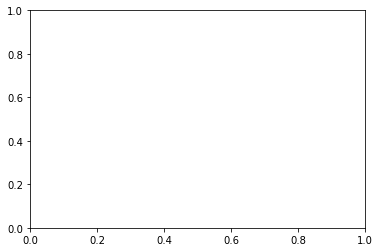

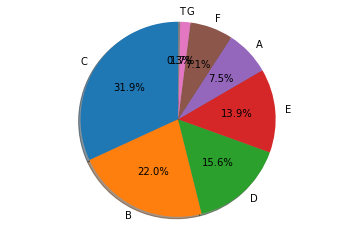

In [354]:
# Write your answer here
''' (UNITS ??)
pclass- an integer from 1 to 3 indicating what class the passengers rode in
survived- a double value equal to 1 if survived, 0 if dead
name- a string of characters representing name of passenger, 26 uppercase, 26 lowercase, space, commas, apostrophes
sex- an integer ? Takes value female or male
age- a double value >= 0 representing age in years, can have decimals (age=0.917)
sibsp- The number of siblings/spouses aboard, stored as a double, >=0
parch- Number of parents/children aboard, stored as double >=0
ticket- Number on ticket, character as it can include letters (like PC ...)
fare-The amount paid by the passenger in GBP back then, double >=0
cabin-int ??? The cabin number (actually entered as chars)
embarked-the city the passenger embarked the ship, can be Cherbourg, Queenstown, Southampton
boat- the emergency boat they got off on ??? 
body- identification number for the body
home.dest- home and destination

Categorical- can only take a finite set of values such as gender, social class, etc.
'''


def printHistograms():      
    travelClass=d['pclass'].value_counts()
    travelClassData = {'1st class':travelClass[1], '2nd class':travelClass[2], '3rd class':travelClass[3]}
    printHist(travelClassData,'Passenger Classes')

    embarked=d['embarked'].value_counts()
    embarkedData = {'Southampton':embarked[0], 'Cherbourg': embarked[1], 'Queenstown': embarked[2]}
    printHist(embarkedData,'Embark location')

    sex=d['sex'].value_counts()
    sexData = {'Male':sex.iloc[0], 'Female': sex.iloc[1]}
    printHist(sexData,'Sex distribution')

    #have to include NAN values as seperate category
    #0-10,11-20,21-30,31-40,41-50 and NAN
    age=pd.cut(d['age'].fillna(value=-1),[-10,0,10,20,30,40,50]).value_counts()
    ageData = {'0 to 10':age.iloc[5], '10 to 20':age.iloc[3], '20 to 30':age.iloc[0],'30 to 40':age.iloc[2],'40 to 50':age.iloc[4],'Unknown':age.iloc[1]}
    printHist(ageData,'Passenger Ages') 
    
def printHist(data,xlabel):
    plt.bar(range(len(data)), data.values(), align='center')
    plt.xticks(range(len(data)),data.keys())
    plt.ylabel('Number of people')
    plt.xlabel(xlabel)
    plt.show()

#printHistograms()

#Calculate the proportion of passengers by cabin floor. Present your results in a pie chart.
#Assuming that each letter represents the cabin floor (A,B,C,D,...)
cabin=d['cabin'].str[0].value_counts()
#cabin=cabin.fillna(value='N')

labels =cabin.keys()
values=cabin

_,ax1 = plt.subplots()
ax1.pie(values, labels=labels, autopct='%1.1f%%',=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()